<a href="https://colab.research.google.com/github/Izquazzle/appl/blob/main/INFO371_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drexel University
## College of Computing and Informatics
## INFO 371: Data Mining Applications
## Assignment 2

## Due Date: Sunday, April 27, 2025
### This assignment counts for 15% of the final grade


## **DON'T FORGET TO PUT YOUR NAME BELOW**

## **NAME: Samay Patel**


### A. What to Hand In

1. A completed this Jupyter notebook.
2. Any data sets used in the assignment.
3. Any multimedia and images used in the assignment.

### B. How to Hand In

Submit your files through the course website in the Blackboard Learn system.

### C. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### D. Answer the following questions

# Collecting the data
The data you will be using in this assignment is the match history data for the NBA for the 2023-2024 season.

The website [http://basketball-reference.com](http://basketball-reference.com) contains a significant number of resources
and statistics collected from the NBA and other leagues.

To download the dataset, perform the following steps:
1. Navigate to [http://www.basketball-reference.com/leagues/NBA_2024_games.html](http://www.basketball-reference.com/leagues/NBA_2024_games.html) in your web browser.
2. Click Share & Export.
3. Click Get table as CSV (for Excel).
4. Copy the data, including the heading, into a text file named nba_2024.csv.
5. Repeat this process for the other months, except do not copy the heading.

This will give you a CSV file containing the results from each game of this season of the NBA.

# Note: In this assignment, ensure that you split the data into train and test sets before training, selecting, and evaluating models. All evaluation must be done on a separate test set.

# Question 1 [5 points]: Load the data as a DataFrame and change the columns to
```
["Date", "Start (ET)", "Visitor Team", "VisitorPts", \
"Home Team", "HomePts", "Unnamed: 6", "Unnamed: 7", "Attend.", "LOG", "Arena", "Notes"]
```
Also, parse the "Date" column as datetime type.

In [503]:
#this is the import statement that adds both pandas and the csv file
import pandas as pd

#csv file is uploaded from a github link
url = 'https://raw.githubusercontent.com/Izquazzle/nba2024/main/nba_2024.csv'

#df will serve as a variable that represents the csv file, making the code more easier to read
df = pd.read_csv(url)



In [504]:
#df.columns will change the name of the
df.columns = ["Date", "Start (ET)", "Visitor Team", "VisitorPts", "Home Team", "HomePts", "Unnamed: 6", "Unnamed: 7", "Attend.", "LOG", "Arena", "Notes"]

#pd.to_datetime changed the format of the Date column
df['Date'] = pd.to_datetime(df['Date'])

#df.head will the that column names have been changed
df.head()


,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,2023-10-24,7:30p,Los Angeles Lakers,107,Denver Nuggets,119,Box Score,NaN,19842,2:17,Ball Arena,NaN
1,2023-10-24,10:00p,Phoenix Suns,108,Golden State Warriors,104,Box Score,NaN,18064,2:33,Chase Center,NaN
2,2023-10-25,7:00p,Houston Rockets,86,Orlando Magic,116,Box Score,NaN,18846,2:14,Kia Center,NaN
3,2023-10-25,7:00p,Boston Celtics,108,New York Knicks,104,Box Score,NaN,19812,2:39,Madison Square Garden (IV),NaN
4,2023-10-25,7:00p,Washington Wizards,120,Indiana Pacers,143,Box Score,NaN,16004,2:07,Gainbridge Fieldhouse,NaN


In [505]:
'''
this will create the training and testing sets
it is better to split the sets after the column names are changed to avoid any additional problems
'''
from sklearn.model_selection import train_test_split

#spliting the two sets this way will allow for more accurate evulations because the values are more random
train_df, test_df = train_test_split(df, test_size=0.2,random_state=42)

In [506]:
#below is the size of each set
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 1055
Test set size: 264


In [507]:
#this will display the training set data
train_df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
598,2024-01-16,10:00p,Oklahoma City Thunder,117,Los Angeles Clippers,128,Box Score,NaN,19370,2:20,Crypto.com Arena,NaN
1213,2024-04-12,10:00p,Houston Rockets,116,Portland Trail Blazers,107,Box Score,NaN,18630,2:07,Moda Center,NaN
209,2023-11-22,7:30p,Milwaukee Bucks,116,Boston Celtics,119,Box Score,NaN,19156,2:13,TD Garden,NaN
538,2024-01-08,7:00p,Oklahoma City Thunder,136,Washington Wizards,128,Box Score,NaN,15297,2:16,Capital One Arena,NaN
140,2023-11-12,8:00p,Oklahoma City Thunder,111,Phoenix Suns,99,Box Score,NaN,17071,2:15,Footprint Center,NaN


# Question 2 [10 points]: Create a target column "VisitorWin": if the visitor team won the game, VisitorWin=True; otherwise, VisitorWin=False.

In [508]:
#this statement will create a new column whose values come from a simple boolean for training set
train_df['VisitorWin'] =  train_df['VisitorPts'] > train_df['HomePts']

#this statement will create a new column whose values come from a simple boolean for test set
test_df['VisitorWin'] =  test_df['VisitorPts'] > test_df['HomePts']

#df.head shows that the column was created for training set
train_df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,VisitorWin
598,2024-01-16,10:00p,Oklahoma City Thunder,117,Los Angeles Clippers,128,Box Score,NaN,19370,2:20,Crypto.com Arena,NaN,False
1213,2024-04-12,10:00p,Houston Rockets,116,Portland Trail Blazers,107,Box Score,NaN,18630,2:07,Moda Center,NaN,True
209,2023-11-22,7:30p,Milwaukee Bucks,116,Boston Celtics,119,Box Score,NaN,19156,2:13,TD Garden,NaN,False
538,2024-01-08,7:00p,Oklahoma City Thunder,136,Washington Wizards,128,Box Score,NaN,15297,2:16,Capital One Arena,NaN,True
140,2023-11-12,8:00p,Oklahoma City Thunder,111,Phoenix Suns,99,Box Score,NaN,17071,2:15,Footprint Center,NaN,True


# Question 3 [10 points]: Convert the Visitor Team names to one-hot vectors.

In [509]:
#this turns the training set data into one-hot vectors
train_ohe = pd.get_dummies(train_df["Visitor Team"])

#this turns the test set data into one-hot vectors
test_ohe = pd.get_dummies(test_df["Visitor Team"])


In [510]:
#this will make sure the columns are aligns between the test and training sets
test_ohe, train_ohe = test_ohe.align(train_ohe, join='left', axis=1)

#this will replace any missing information with a zero
train_ohe.fillna(0, inplace=True)
test_ohe.fillna(0, inplace=True)


In [511]:
#this displays the one-hot vectors
train_ohe.head()


,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,...,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
598,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Question 4 [15 points]: Create a Scikit-Learn decision tree classifier with default values. Apply 5-fold cross validation to fit the classifier on the one-hot vectors corresponding to the visitor team names and the target 'VisitorWin'. Use accuracy for scoring the model. Print out the average score of the cross validation.

In [512]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 598 to 1126
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1055 non-null   datetime64[ns]
 1   Start (ET)    1055 non-null   object        
 2   Visitor Team  1055 non-null   object        
 3   VisitorPts    1055 non-null   int64         
 4   Home Team     1055 non-null   object        
 5   HomePts       1055 non-null   int64         
 6   Unnamed: 6    1055 non-null   object        
 7   Unnamed: 7    49 non-null     object        
 8   Attend.       1055 non-null   int64         
 9   LOG           1050 non-null   object        
 10  Arena         1055 non-null   object        
 11  Notes         64 non-null     object        
 12  VisitorWin    1055 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(8)
memory usage: 140.5+ KB


In [513]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

Below is variables that will be referenced multiple times throughout the code

In [514]:
#y_train represents the dependant variable of the data
#y_train will be referenced mutliple times throughout the code
y_train = train_df["VisitorWin"]
y_test = test_df["VisitorWin"]
#DecisionTreeClassifier has the ability to perform multi classification
CLF = DecisionTreeClassifier()

In [515]:
'''
cross_val_score is the function that performs cross validation
cv=5 ensures that 5-fold is being used
'''
scores = cross_val_score(CLF, train_ohe, y_train, cv=5)

In [516]:
#np.mean uses the numpy library to calculate the average of the values
print("Decision Tree accuracy:", np.mean(scores))

Decision Tree accuracy: 0.6028436018957346


# Question 5 [20 points]: Create two new feature columns: HomeWonLast and VisitorWonLast: if the home team won the previous game, HomeWonLast=1 and VisitorWonLast=0; otherwise, HomeWonLast=0 and VisitorWonLast=1

In [517]:
'''
sort_values("Date") organized the values by their date
reset_index(drop=True) resets the index of the values while preventing the old index from appearing again
'''
train_df = train_df.sort_values("Date").reset_index(drop=True)
test_df = test_df.sort_values("Date").reset_index(drop=True)

In [518]:
#this will set the first row to 0 as there were no previous games
train_df.loc[0, 'VisitorWonLast'] = False
train_df.loc[0, 'HomeWonLast'] = False


test_df.loc[0, 'VisitorWonLast'] = False
test_df.loc[0, 'HomeWonLast'] = False


In [519]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1055 non-null   datetime64[ns]
 1   Start (ET)      1055 non-null   object        
 2   Visitor Team    1055 non-null   object        
 3   VisitorPts      1055 non-null   int64         
 4   Home Team       1055 non-null   object        
 5   HomePts         1055 non-null   int64         
 6   Unnamed: 6      1055 non-null   object        
 7   Unnamed: 7      49 non-null     object        
 8   Attend.         1055 non-null   int64         
 9   LOG             1050 non-null   object        
 10  Arena           1055 non-null   object        
 11  Notes           64 non-null     object        
 12  VisitorWin      1055 non-null   bool          
 13  VisitorWonLast  1 non-null      object        
 14  HomeWonLast     1 non-null      object        
dtypes: b

In [520]:
#idx stands for the index value and is being used in a for loop to

for idx in range(1, len(train_df)):
  if idx > 0:
    # Directly check the 'VisitorWin' value of the previous row
      train_df.loc[idx, 'VisitorWonLast'] = True if train_df.loc[idx - 1, 'VisitorWin'] else False
      train_df.loc[idx, 'HomeWonLast'] = False if train_df.loc[idx - 1, 'VisitorWin'] else True

for idx in range(1, len(test_df)):
  if idx > 0:
      test_df.loc[idx, 'VisitorWonLast'] = True if test_df.loc[idx - 1, 'VisitorWin'] else False
      test_df.loc[idx, 'HomeWonLast'] = False if test_df.loc[idx - 1, 'VisitorWin'] else True

In [521]:
#displays the values in chronological order
train_df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,VisitorWin,VisitorWonLast,HomeWonLast
0,2023-10-24,10:00p,Phoenix Suns,108,Golden State Warriors,104,Box Score,NaN,18064,2:33,Chase Center,NaN,True,False,False
1,2023-10-24,7:30p,Los Angeles Lakers,107,Denver Nuggets,119,Box Score,NaN,19842,2:17,Ball Arena,NaN,False,True,False
2,2023-10-25,7:30p,Minnesota Timberwolves,94,Toronto Raptors,97,Box Score,NaN,19800,2:10,Scotiabank Arena,NaN,False,False,True
3,2023-10-25,9:30p,Dallas Mavericks,126,San Antonio Spurs,119,Box Score,NaN,18947,2:20,Frost Bank Center,NaN,True,False,True
4,2023-10-25,7:00p,Houston Rockets,86,Orlando Magic,116,Box Score,NaN,18846,2:14,Kia Center,NaN,False,True,False


# Question 6 [10 points]: Apply 5-fold cross validation to fit a decision tree classifier on HomeWonLast and VisitorWonLast against the target VisitorWin. Print out the average accuracy score.

In [522]:
#x_train represents the independant variable
x_train_1 = train_df[['HomeWonLast', 'VisitorWonLast']]
x_test_1 = test_df[['HomeWonLast', 'VisitorWonLast']]


# Apply 5-fold cross-validation
cv_scores = cross_val_score(CLF, x_train_1, y_train, cv=5)

# Calculate and print the average accuracy score
print(f"Decision Tree CV accuracy:  ",np.mean(cv_scores))


Decision Tree CV accuracy:   0.55260663507109


# Question 7 [10 points]: Apply 5-fold cross validation to fit a decision tree classifier on visitor team names (one-hot vectors), HomeWonLast, and VisitorWonLast against the target VisitorWin. Print out the average accuracy score. Does the preformance change?

In [525]:
#The indices got misaligned so in order to correct them they were reset, thus preventing inconsistent columns errors
train_ohe = train_ohe.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)



test_ohe = test_ohe.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [526]:
#x_train_2 combines Visitor Teams, HomeWonLast and VisitorWon together
x_train_2 = pd.concat([
    train_ohe,
    train_df[["HomeWonLast", "VisitorWonLast"]]
], axis=1)


x_test_2 = pd.concat([
    test_ohe,
    test_df[["HomeWonLast", "VisitorWonLast"]]
], axis=1)


In [527]:
#below is the accuracy score when x_train_2 is compared to VisitorWin
scores_2 = cross_val_score(CLF, x_train_2, y_train, cv=5, scoring='accuracy')
print("Decision Tree CV accuracy:", np.mean(scores_2))

Decision Tree CV accuracy: 0.6


***When I ran the average accuracy score again the performance improved from 0.54 to 0.58. This improvment it a direct result of factoring the Visitor Team which is a one-hot vector data. By adding in the one-hot vector, we were able to account for any catergorical data in the data set.***

# Question 8 [10 points]: Create a Scikit-Learn random forest classifier with default values. Apply 5-fold cross validation to fit the random forest classifier on visitor team names (one-hot vectors), HomeWonLast, and VisitorWonLast against the target VisitorWin. Print out the average accuracy score. Does the performance change?



In [528]:
#Random Forest Classifier makes use of multiple decision trees and could provide a different performance than Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier


clf_rf_default = RandomForestClassifier()

scores_rf_default = cross_val_score(clf_rf_default, x_train_2, y_train, cv=5)
print("Random Forest CV accuracy:", np.mean(scores_rf_default))

Random Forest CV accuracy: 0.6009478672985782


***The performance improved again this time from 0.58 to 0.59. While the improvement to the average accuracy score is minor it is still present. From this I can interpret two things, either the two classifers preformed similarly or that there is some underlying issue that I haven't noticed yet. These two classifers are very popular but have some key differences. Such as likelyhood of overfitting and its nature.***

# Question 9 [10 points]: Conduct a grid search for selecting the best random forest model fitting on visitor team names (one-hot vectors), HomeWonLast, and VisitorWonLast against the target VisitorWin. In the grid search, change the following parameters with different values: "max_features", "n_estimators", and "min_samples_leaf". Print out the best model and the average score of the model. Is the performance of the best model better than the previous models?

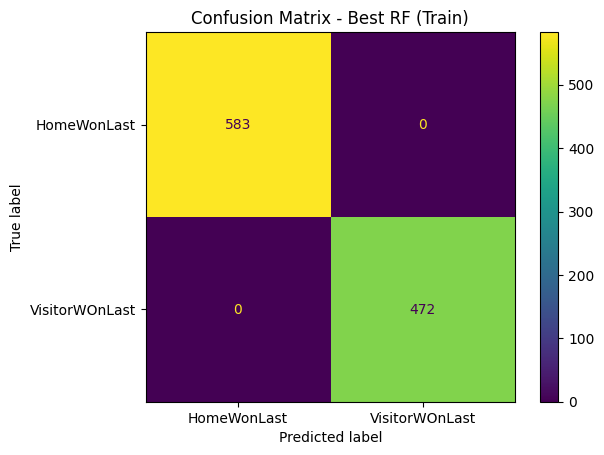

In [529]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For demonstration, let's do a quick train set predict to see how well it fits.
best_rf_model.fit(x_train_2, y_train)
y_train_pred = best_rf_model.predict(x_train_2)

cm = confusion_matrix(y_train, y_train, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HomeWonLast", "VisitorWOnLast"])
disp.plot()
disp.ax_.set_title("Confusion Matrix - Best RF (Train)")
plt.show()

In [530]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_features": [0.5, "sqrt", "log2"],
    "n_estimators": [50, 100, 200],
    "min_samples_leaf": [1, 2, 5]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train_2, y_train)

#output of final output of training data
print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
best_rf_model

Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
Best CV score: 0.5990521327014218


RandomForestClassifier(min_samples_leaf=5, random_state=42)

***While the performance of the best model is better than the rest of the models, its barely better than them. With an accuracy score of 0.59, the various performances differ about 0.02, which isn't alot. Due to this and the fact that I haven't recieved any errors while doing these performances, I am going to assume that all the models perform similarly. There is room for error, but the fact that 4 different models are about the same, I am fairly confident. ***

#Evulation of Test Set

In [501]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# For demonstration, let's do a quick train set predict to see how well it fits.
best_rf_model.fit(x_train_2, y_train)
y_train_pred = best_rf_model.predict(x_train_2)


Test accuracy: 0.4734848484848485


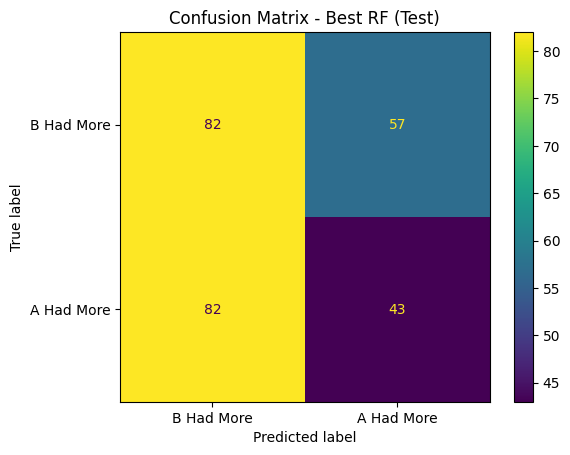

In [531]:
# Prepare test features
test_X = pd.concat([
    test_ohe,
    test_df[["HomeWonLast", "VisitorWonLast"]]
], axis=1)
test_y = test_df["VisitorWin"]

# Evaluate test accuracy
test_accuracy = best_rf_model.score(test_X, test_y)
print("Test accuracy:", test_accuracy)

# Confusion matrix on test set
y_test_pred = best_rf_model.predict(test_X)
cm_test = confusion_matrix(test_y, y_test_pred, labels=[False, True])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["B Had More", "A Had More"])
disp_test.plot()
disp_test.ax_.set_title("Confusion Matrix - Best RF (Test)")
plt.show()